In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/gene_expression.csv')

In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [8]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

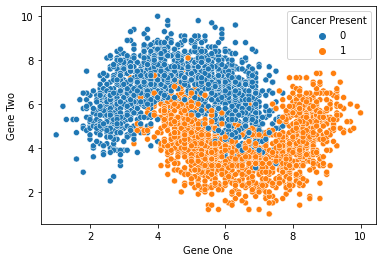

In [9]:
sns.scatterplot(x='Gene One', y='Gene Two', data=df, hue='Cancer Present')

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

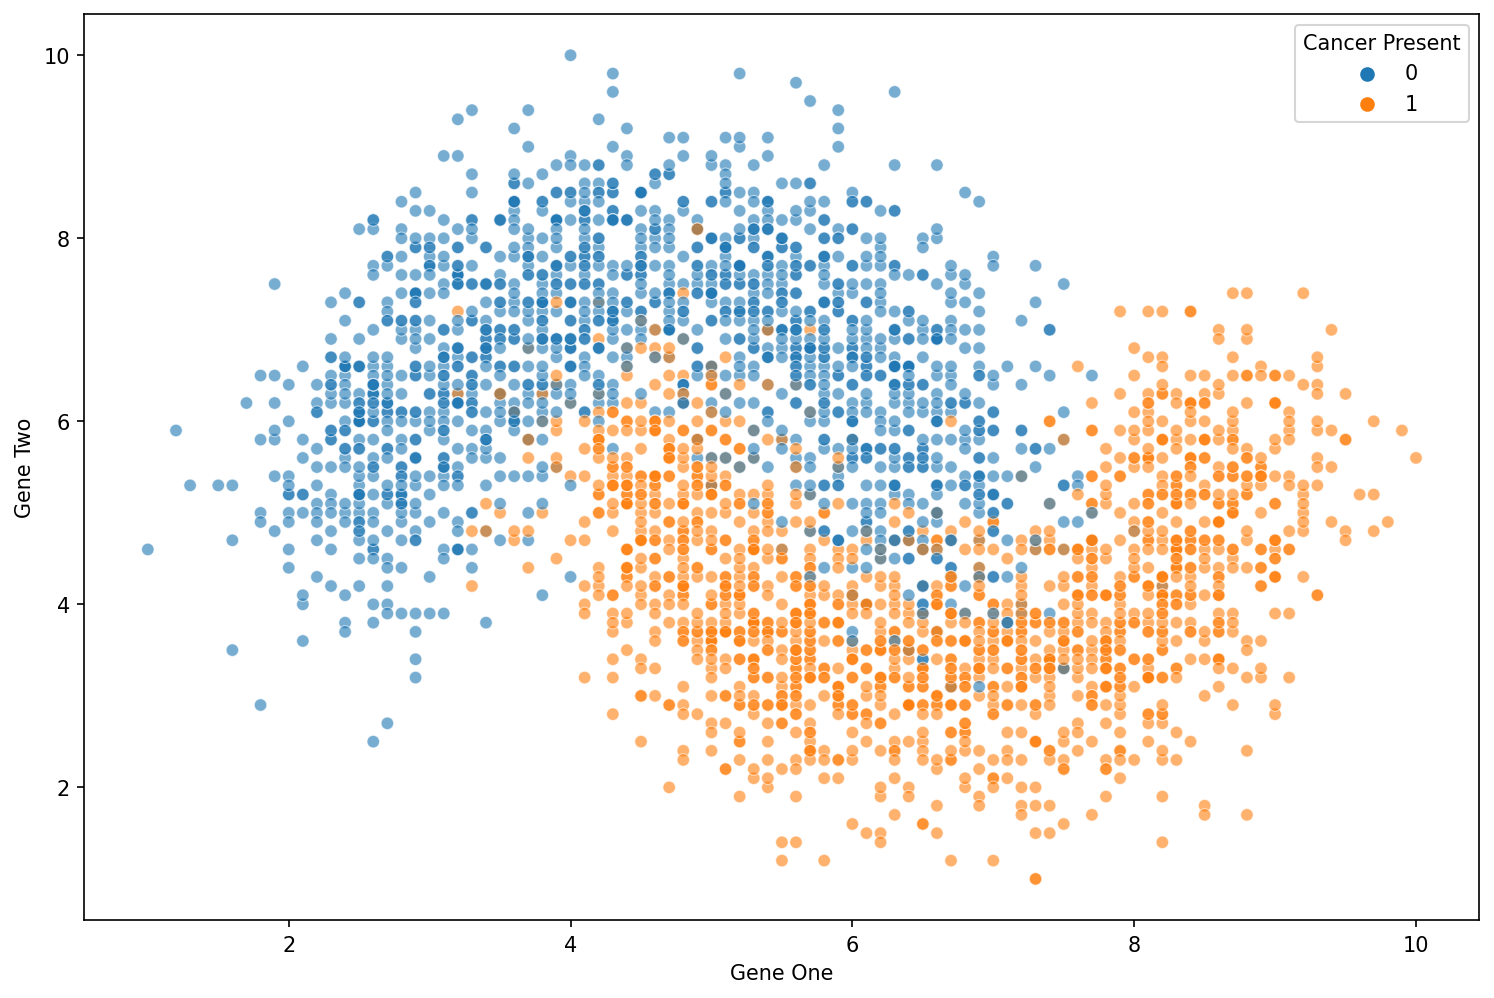

In [20]:
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(x='Gene One', y='Gene Two', data=df, hue='Cancer Present', alpha=0.6)

(4.0, 8.0)

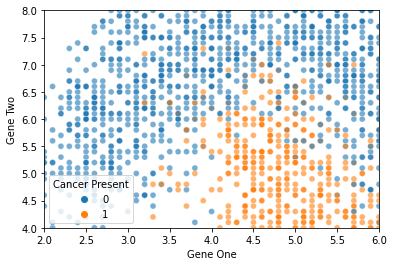

In [23]:
# plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(x='Gene One', y='Gene Two', data=df, hue='Cancer Present', alpha=0.6)

plt.xlim(2, 6)
plt.ylim(4, 8)

(4.0, 8.0)

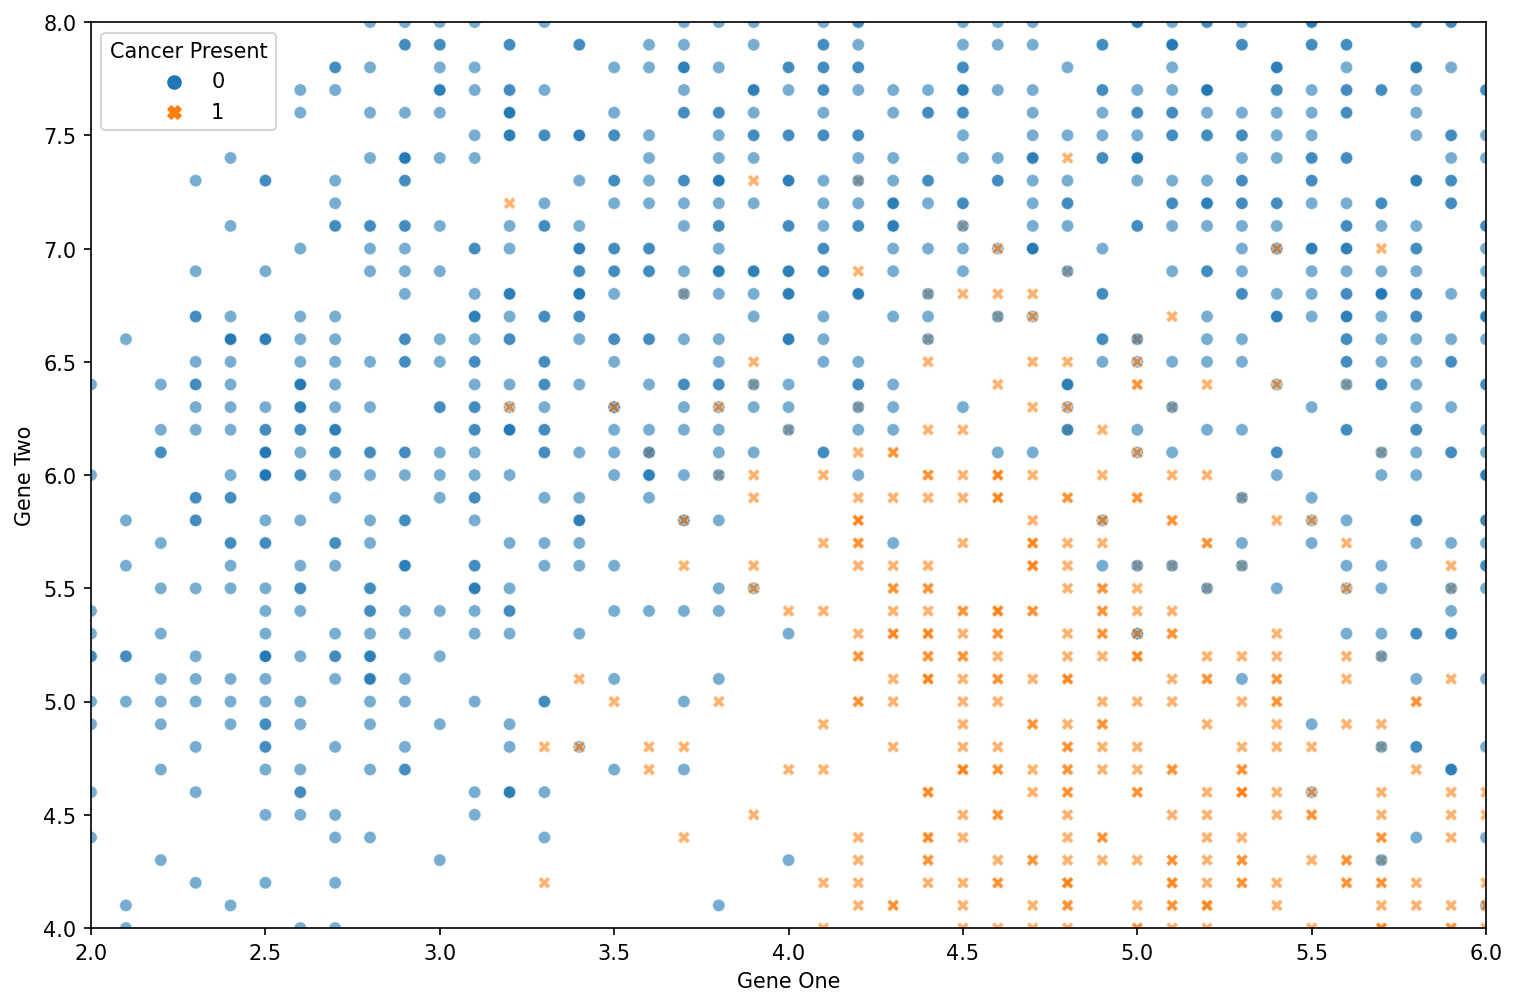

In [25]:
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(x='Gene One', y='Gene Two', data=df, hue='Cancer Present', alpha=0.6, style='Cancer Present')

plt.xlim(2, 6)
plt.ylim(4, 8)

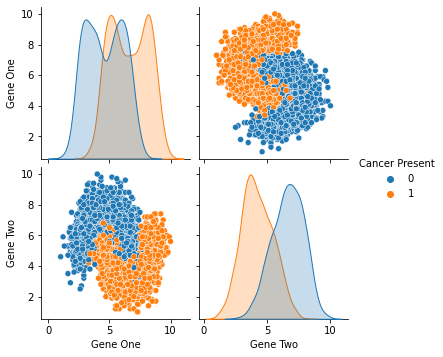

In [26]:
sns.pairplot(data=df, hue='Cancer Present')

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# help(KNeighborsClassifier)

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [38]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
y_pred = knn_model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [42]:
confusion_matrix(y_test, y_pred)

array([[420,  50],
       [ 47, 383]])

In [43]:
len(y_test)

900

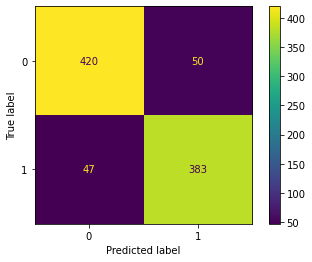

In [46]:
plot_confusion_matrix(knn_model, X_test, y_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [48]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64